# **Module 1: Spatial Dependence and Regression**

### **Exercises**
#### Data
For the exercies, data are created and saved to the directory `./data-module-1/`.
- `mwi.shp` -  a dataset downloaded from the Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data (available from https://microdata.worldbank.org/index.php/catalog/3818).

In [2]:
# general use packages
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels

# geospatial packages
import geopandas as gpd
from libpysal import weights
import esda
import spreg
from splot.esda import plot_moran, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

**Question 1. Read the vector dataset `mwi.shp` into a `GeoDataFrame`. Print its Coordinate Reference System. Explore the attributes of this dataset.**

In [3]:
mwi = gpd.read_file("./data-module-1/mwi.shp")
print (mwi.crs)
mwi.head()

EPSG:20935


,ADM2_EN,ADM1_EN,croplnd,edu,female,income,livstck,tobccHH,poverty,geometry
0,Balaka,Southern,0.207533,1.747295,0.129346,29.024301,0.116892,0.002999,186.607208,"POLYGON ((1385377.605 8352507.056, 1386124.785..."
1,Blantyre,Southern,0.166662,2.065374,0.141596,30.266483,0.140718,0.000000,266.750719,"MULTIPOLYGON (((1371099.318 8230405.148, 13712..."
2,Blantyre City,Southern,0.031450,1.020701,0.025584,11.309476,0.026401,0.000000,170.090955,"POLYGON ((1368815.842 8246703.150, 1368439.061..."
3,Chikwawa,Southern,0.177895,1.557495,0.099996,27.977547,0.296069,0.000000,161.600991,"POLYGON ((1289104.025 8246202.633, 1289161.013..."
4,Chiradzulu,Southern,0.100752,1.427774,0.106706,20.452582,0.138036,0.003870,173.972732,"POLYGON ((1376992.722 8266136.968, 1376927.122..."


**Question 2. Calculate neighboring using Queen's case (contiguity), Rook's case (contiguity), K-nearest neighbors (k=3), and distance (200,000 m). Visualize and compare all 4 weights networks. What differences do you see?** 

In [4]:
# calculate neighboring using Queen's case (contiguity)
mwi_nbq = weights.contiguity.Queen.from_dataframe(mwi, use_index=False)
# calculate neighboring using Rook's case (contiguity)
mwi_nbr = weights.contiguity.Rook.from_dataframe(mwi, use_index=False)
# calculate neighboring using K-nearest neighbors (distance-based)
mwi_nbk3 = weights.distance.KNN.from_dataframe(mwi, k=3)
# calculate neighboring by distance (distance-based)
mwi_nbd = weights.distance.DistanceBand.from_dataframe(mwi, 200000)

/home/u01000486/.local/lib/python3.11/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


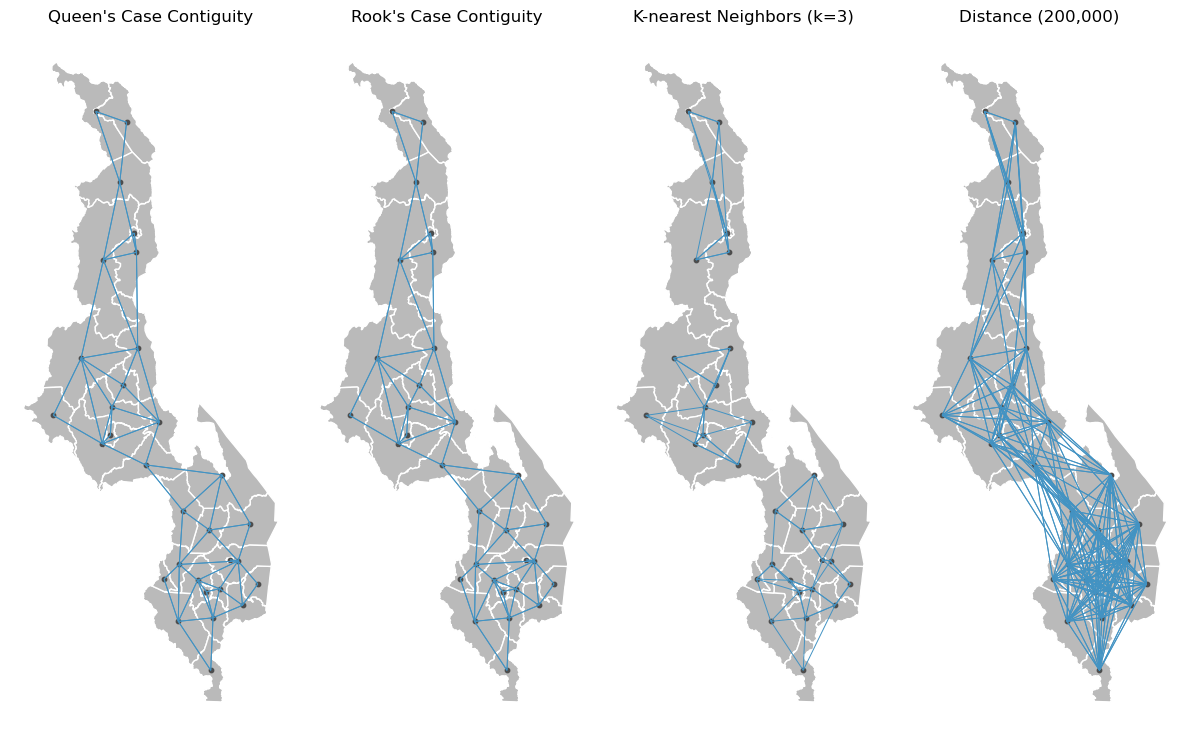

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8), tight_layout=True)

plot_spatial_weights(mwi_nbq, mwi, ax=axs[0])
axs[0].set_title("Queen's Case Contiguity")

plot_spatial_weights(mwi_nbr, mwi, ax=axs[1])
axs[1].set_title("Rook's Case Contiguity")

plot_spatial_weights(mwi_nbk3, mwi, ax=axs[2])
axs[2].set_title("K-nearest Neighbors (k=3)")

plot_spatial_weights(mwi_nbd, mwi, ax=axs[3])
axs[3].set_title("Distance (200,000)")

plt.show()

**Question 3.  Print the properties for Distance based spatial weights matrix, such as number of units, number of nonzero weights, etc.**

In [6]:
print (f"Number of units: {mwi_nbd.n}")
print (f"Number of nonzero weights: {mwi_nbd.nonzero}")
print (f"Percentage of nonzero weights: {mwi_nbd.pct_nonzero}")
print (f"Average number of neighbors: {mwi_nbd.mean_neighbors}")
print (f"Largest number of neighbors is {mwi_nbd.max_neighbors}")
print (f"Minimum number of neighbors is {mwi_nbd.min_neighbors}")
print (f"Number of units without any neighbors {len(mwi_nbd.islands)}")
print (f"Neighbour list: {mwi_nbd.neighbors}")

Number of units: 31
Number of nonzero weights: 404
Percentage of nonzero weights: 42.039542143600414
Average number of neighbors: 13.03225806451613
Largest number of neighbors is 20
Minimum number of neighbors is 4
Number of units without any neighbors 0
Neighbour list: {0: [1, 2, 3, 4, 6, 10, 11, 12, 13, 15, 16, 19, 22, 23, 25, 27, 28, 29, 30], 1: [0, 2, 3, 4, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 2: [0, 1, 3, 4, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 3: [0, 1, 2, 4, 12, 15, 16, 19, 22, 23, 25, 28, 29, 30], 4: [0, 1, 2, 3, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 5: [8, 18, 20, 26], 6: [0, 1, 2, 4, 7, 9, 10, 11, 12, 13, 14, 16, 19, 21, 23, 24, 27, 29, 30], 7: [6, 9, 10, 11, 13, 14, 21, 23, 24, 27], 8: [5, 17, 18, 20, 26], 9: [6, 7, 10, 11, 14, 17, 18, 20, 21, 24, 27], 10: [0, 6, 7, 9, 11, 13, 14, 19, 21, 23, 24, 27], 11: [0, 6, 7, 9, 10, 13, 14, 19, 21, 23, 24, 27], 12: [0, 1, 2, 3, 4, 6, 13, 15, 16, 19, 23, 25, 27, 28, 29, 30], 13: [0, 1, 2, 4, 6, 7, 10, 11,

**Question 4. Apply row-standardized transform to your Distance based neighbourhood.**

In [7]:
# Spatial Weights Summary - Row Standardized
mwi_nbq.set_transform("R")
mwi_nbq_lw_r = mwi_nbq.to_adjlist()
print (f"Weights: {mwi_nbq.weights}")
print ("Weights summary: ")
print (mwi_nbq_lw_r["weight"].describe())

Weights: {0: [0.2, 0.2, 0.2, 0.2, 0.2], 1: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 2: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 3: [0.2, 0.2, 0.2, 0.2, 0.2], 4: [0.2, 0.2, 0.2, 0.2, 0.2], 5: [0.5, 0.5], 6: [0.25, 0.25, 0.25, 0.25], 7: [0.2, 0.2, 0.2, 0.2, 0.2], 8: [0.5, 0.5], 9: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 10: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 11: [0.5, 0.5], 12: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 13: [0.25, 0.25, 0.25, 0.25], 14: [0.5, 0.5], 15: [0.25, 0.25, 0.25, 0.25], 16: [0.5, 0.5], 17: [0.2, 0.2, 0.2, 0.2, 0.2], 18: [0.5, 0.5], 19: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666],

**Question 5. Run the Moran's I statistic to test the spatial autocorrelation for `poverty` variable. Use Distance based neighbouring structure. Visualize Moran's I plot for `poverty` variable.**

In [8]:
mi = esda.moran.Moran(mwi["poverty"], mwi_nbd)
print("Moran's I statistic: {}".format(mi.I))
print("p-value of I under randomization assumption: {}".format(mi.p_rand))
print ("variance of I under randomization assumption: {}".format(mi.VI_rand))
print ("Expected value under normality assumption: {}".format(mi.EI))

Moran's I statistic: 0.23844302172234336
p-value of I under randomization assumption: 2.121219617536215e-06
variance of I under randomization assumption: 0.0032854009963080915
Expected value under normality assumption: -0.03333333333333333


/home/u01000486/.local/lib/python3.11/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


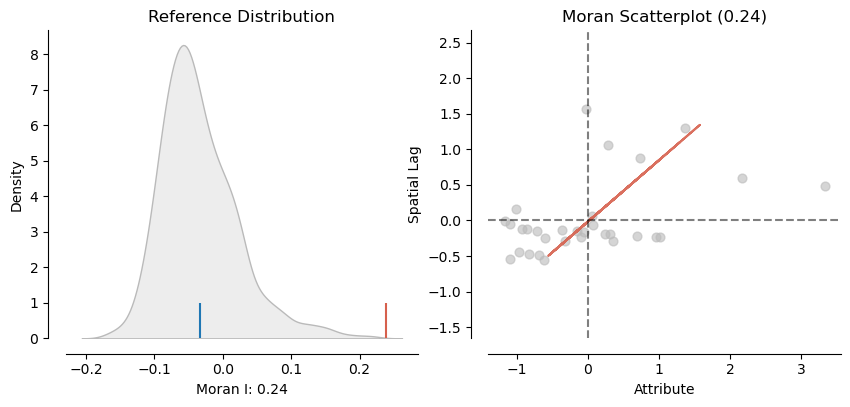

In [9]:
plot_moran(mi)
plt.show()

**Question 6. Compute and visualize Local Moran's I for `poverty` variable.**

In [16]:
mi_loc = esda.Moran_Local(mwi["poverty"], mwi_nbd)

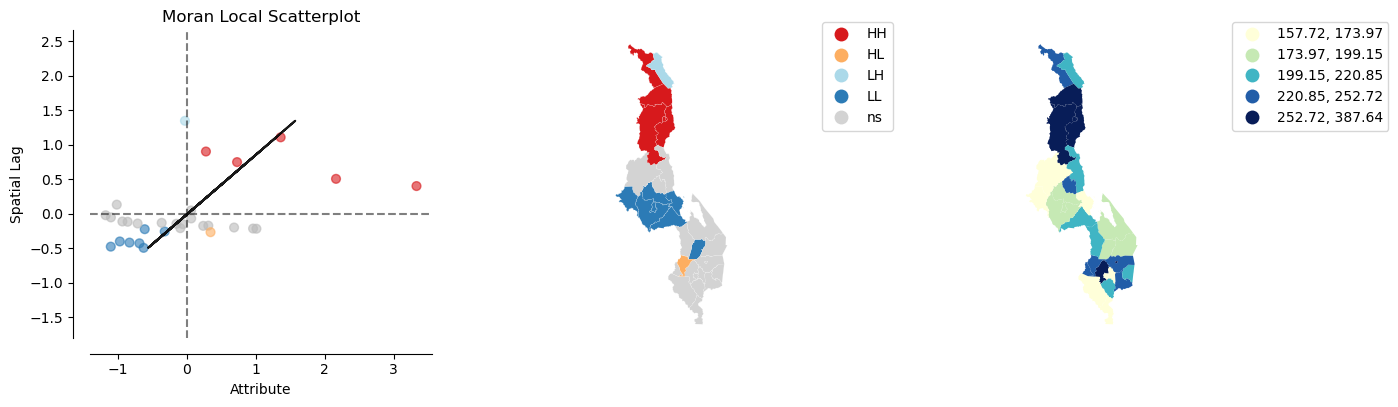

In [17]:
plot_local_autocorrelation(mi_loc, mwi, "poverty")
plt.show()

**Question 7. Run the Ordinary least squares model with Spatial Diagnostics. Use Distance based neighbouring structure. Predict `poverty` as a function of cropland cultivated `croplnd`, livestock owned `livstck`, share of off-farm income `income`, years of education `edu`, female head of household `female` and tobacco growing household `tobccHH`.**

In [12]:
y = mwi["poverty"].to_numpy()
x = mwi[["croplnd", "livstck", "income", "edu", "female", "tobccHH"]].values

In [13]:
mwi_ols = spreg.OLS(y, x, w=mwi_nbd, name_w="Distance based", 
                    name_x=["croplnd", "livstck", "income", "edu", "female", "tobccHH"], 
                    name_y="poverty", name_ds="Malawi Poverty function",
                    white_test=True, spat_diag=True, moran=True)

**Question 8. Run ML estimation of the spatial lag model. Use the same neighbouring structure, `x`, and `y` formulation as for the previous question.**

In [14]:
mwi_slm = spreg.ML_Lag(y, x, w=mwi_nbd, name_w="Distance based", 
                       name_x=["croplnd", "livstck", "income", "edu", "female", "tobccHH"],
                       name_y="poverty", name_ds="Malawi Poverty function")
print(mwi_slm.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :Malawi Poverty function
Weights matrix      :Distance based
Dependent Variable  :     poverty                Number of Observations:          31
Mean dependent var  :    217.5707                Number of Variables   :           8
S.D. dependent var  :     51.8791                Degrees of Freedom    :          23
Pseudo R-squared    :      0.7408
Spatial Pseudo R-squared:  0.7343
Log likelihood      :   -144.9765
Sigma-square ML     :    675.0884                Akaike info criterion :     305.953
S.E of regression   :     25.9825                Schwarz criterion     :     317.425

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------------------------------